# At-Risk Heroin-Abuse Prediction Model Using TensorFlow

The following notebook contains Python code to identify a human being as a potential abuser of heroin. Using the UCI dataset for drug consumption located, we are able to build a Wide-Deep Learning Model that combines the benefits of Linear Models with Sparse and Crossed Features and Deep Neural Networs.  

The Drug Consumption data set with documentation can be located here: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+(quantified)

### Import all of the required packages for Tensorflow and Data Engineering:  
* [tensorflow](https://www.tensorflow.org)
* [numpy](http://www.numpy.org)
* [pandas](http://pandas.pydata.org)
* [matplotlib](https://matplotlib.org)

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import os
import sys
import shutil

from six.moves import urllib
from matplotlib import pyplot as plt

import numpy as np
import tensorflow as tf
import numpy as np
import pandas as pd

### Download and Clean Up the Data  
First, we set some variables to manage where our data is located and where we want it to live.

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00373'
file_name = 'drug_consumption.data'
file_url = '%s/%s' % (url, file_name)
data_directory = '/tmp/drug_data'

Next, we download the data, perform some cleaning on it, and save it to our data directory.

In [3]:
# If directory does not exist, make the directory.
if not tf.gfile.Exists(data_directory):
    tf.gfile.MkDir(data_directory)

# Create a temporary file to hold the original.
temp_file, _ = urllib.request.urlretrieve(file_url)
clean_file = os.path.join(data_directory, file_name)

# Read the temporary file and write the cleaned up data to the permanent file.
with tf.gfile.Open(temp_file, 'r') as temp_eval_file:
    with tf.gfile.Open(clean_file, 'w') as eval_file:
      for line in temp_eval_file:
        line = line.strip()
        line = line.replace(', ', ',')
        if not line or ',' not in line:
          continue
        if line[-1] == '.':
          line = line[:-1]
        line += '\n'
        eval_file.write(line)
tf.gfile.Remove(temp_file)

### Data Engineering and Exploration  
Using a combination of pandas and matplotlib, we are able to parse our csv into a Dataframe object and visualize the data in the form of tables and plots.  

First, we load the data into a Dataframe and display a sample of the data.

In [4]:
# The column names for our csv data.
csv_columns = [
    'id', 'age', 'gender', 'education', 'country', 'ethnicity', 'n_score',
    'e_score', 'o_score', 'a_score', 'c_score', 'impulsive', 'ss', 'alcohol', 
    'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 
    'ecstasy', 'heroin', 'ketamine', 'legal_h', 'lsd', 'meth', 'mushroom', 
    'nicotine', 'semer', 'vsa'
] 


# Read the entire csv (no header), apply column names to the data, and use the 'id' column as an index. 
# Force String type on all records.

data = pd.read_csv(clean_file, header=None, names=csv_columns, index_col='id', dtype=str)

# Display the top 10 records.
data.head(10)

,age,gender,education,country,ethnicity,n_score,e_score,o_score,a_score,c_score,...,ecstasy,heroin,ketamine,legal_h,lsd,meth,mushroom,nicotine,semer,vsa
id,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


The Dataframe contains 3 types of data: demographic information, psychological personality scores, and drug-use survey answers.

In this case, we are interested in observing the potential abuse of heroin. We define the presence of a risk of heroin abuse as having claimed to have used heroin within the last year.

To have this reflect in our Dataframe, we map each response to a 0 (representing no presence of risk of abuse) or 1 (representing presence of a risk of abuse).

In [5]:
risk_map = {
    "CL0" : 0, # Never Used
    "CL1" : 0, # Used over a Decade Ago
    "CL2" : 0, # Used in Last Decade
    "CL3" : 1, # Used in Last Year
    "CL4" : 1, # Used in Last Month
    "CL5" : 1, # Used in Last Week
    "CL6" : 1 # Used in Last Day
}

# If a given key is present in the risk_map, return its value. Otherwise, default to 0.
def assess_risk(key):
    if key in risk_map:
        return risk_map[key]
    else:
        return 0

# Reassign the values of the 'heroin' column to their corresponding value in the risk_map.
data['heroin'] = data['heroin'].apply(assess_risk)

We want to perform any last data engineering tasks before running creating our train and test data sets. Below, we specify many lookup maps for the various categorical features. These maps are used to convert the numerical representation of the data to its contextual representation.

In [6]:
# A function that takes a lookup map and a key and returns the value of the key, or None if the key is not present.
def lookup(lookup_map, key):
    if key in lookup_map:
        return lookup_map[key]
    else:
        return None

age_map = {
    '-0.95197':'18-24',
    '-0.07854':'25-34',
    '0.49788':'35-44',
    '1.09449':'45-54',
    '1.82213':'55-64',
    '2.59171':'65+'
}

gender_map = {
    '0.48246': 'f',
    '-0.48246': 'm'
}

education_map = {
    '-2.43591': 'Left school before 16 years',
    '-1.73790': 'Left school at 16 years',
    '-1.43719': 'Left school at 17 years',
    '-1.22751': 'Left school at 18 years',
    '-0.61113': 'Some college or university, no certificate or degree',
    '-0.05921': 'Professional certificate/ diploma',
    '0.45468': 'University degree',
    '1.16365': 'Masters degree',
    '1.98437': 'Doctorate degree'
}

country_map = {
    '-0.09765': 'Australia',
    '0.24923': 'Canada',
    '-0.46841': 'New Zealand',
    '-0.28519': 'Other',
    '0.21128': 'Republic of Ireland',
    '0.96082': 'UK',
    '-0.57009': 'USA'
}

ethnicity_map = {
    '-0.50212': 'Asian',
    '-1.10702': 'Black',
    '1.90725': 'Mixed-Black/Asian',
    '0.12600': 'Mixed-White/Asian',
    '-0.22166': 'Mixed-White/Black',
    '0.11440': 'Other',
    '-0.31685': 'White'
}

consumption_map = {
    "CL0": "Never Used",
    "CL1": "Used over a Decade Ago",
    "CL2": "Used in Last Decade",
    "CL3": "Used in Last Year",
    "CL4": "Used in Last Month",
    "CL5": "Used in Last Week",
    "CL6": "Used in Last Day"
}

data['age'] = data['age'].apply(lambda x: lookup(age_map, x))
data['gender'] = data['gender'].apply(lambda x: lookup(gender_map, x))
data['education'] = data['education'].apply(lambda x: lookup(education_map, x))
data['country'] = data['country'].apply(lambda x: lookup(country_map, x))
data['ethnicity'] = data['ethnicity'].apply(lambda x: lookup(ethnicity_map, x))
data['alcohol'] = data['alcohol'].apply(lambda x: lookup(consumption_map, x))
data['amphet'] = data['amphet'].apply(lambda x: lookup(consumption_map, x))
data['amyl'] = data['amyl'].apply(lambda x: lookup(consumption_map, x))
data['benzos'] = data['benzos'].apply(lambda x: lookup(consumption_map, x))
data['caff'] = data['caff'].apply(lambda x: lookup(consumption_map, x))
data['cannabis'] = data['cannabis'].apply(lambda x: lookup(consumption_map, x))
data['choc'] = data['choc'].apply(lambda x: lookup(consumption_map, x))
data['ketamine'] = data['ketamine'].apply(lambda x: lookup(consumption_map, x))
data['nicotine'] = data['nicotine'].apply(lambda x: lookup(consumption_map, x))
data['vsa'] = data['vsa'].apply(lambda x: lookup(consumption_map, x))
data.drop('coke', axis=1, inplace=True)
data.drop('crack', axis=1, inplace=True)
data.drop('ecstasy', axis=1, inplace=True)
data.drop('legal_h', axis=1, inplace=True)
data.drop('lsd', axis=1, inplace=True)
data.drop('meth', axis=1, inplace=True)
data.drop('semer', axis=1, inplace=True)
data.drop('mushroom', axis=1, inplace=True)
data.head(10)

,age,gender,education,country,ethnicity,n_score,e_score,o_score,a_score,c_score,...,amphet,amyl,benzos,caff,cannabis,choc,heroin,ketamine,nicotine,vsa
id,,,,,,,,,,,,,,,,,,,,,
1,35-44,f,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used,Used in Last Week,0,Never Used,Used in Last Decade,Never Used
2,25-34,m,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,Used in Last Decade,Used in Last Decade,Never Used,Used in Last Day,Used in Last Month,Used in Last Day,0,Used in Last Decade,Used in Last Month,Never Used
3,35-44,m,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,Never Used,Never Used,Never Used,Used in Last Day,Used in Last Year,Used in Last Month,0,Never Used,Never Used,Never Used
4,18-24,f,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Decade,Used in Last Month,0,Used in Last Decade,Used in Last Decade,Never Used
5,35-44,f,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,Used over a Decade Ago,Used over a Decade Ago,Never Used,Used in Last Day,Used in Last Year,Used in Last Day,0,Never Used,Used in Last Decade,Never Used
6,65+,f,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,Never Used,Never Used,Never Used,Used in Last Day,Never Used,Used in Last Month,0,Never Used,Used in Last Day,Never Used
7,45-54,m,Masters degree,USA,White,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,Never Used,Never Used,Never Used,Used in Last Day,Used over a Decade Ago,Used in Last Week,0,Never Used,Used in Last Day,Never Used
8,35-44,m,Left school at 16 years,UK,White,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,Never Used,Never Used,Never Used,Used in Last Day,Never Used,Used in Last Month,0,Never Used,Never Used,Never Used
9,35-44,f,Professional certificate/ diploma,Canada,White,0.62967,2.57309,-0.97631,0.76096,1.13407,...,Never Used,Never Used,Never Used,Used in Last Day,Never Used,Used in Last Day,0,Never Used,Used in Last Day,Never Used


With our 'heroin' column properly labeled, and our data fields converted to something a little more readable, we can now do some analysis. Below are some aggregations that allow us to see how the distribution of at-risk people across various demographic groups.

In [7]:
age = data.groupby(['age', 'heroin'])['age'].count()
gender = data.groupby(['gender', 'heroin'])['gender'].count()
country = data.groupby(['country', 'heroin'])['country'].count()
ethnicity = data.groupby(['ethnicity', 'heroin'])['ethnicity'].count()
education = data.groupby(['education', 'heroin'])['education'].count()

print(age, "\n")
print(gender, "\n")
print(country, "\n")
print(ethnicity, "\n")
print(education)

age    heroin
18-24  0         573
       1          70
25-34  0         449
       1          32
35-44  0         346
       1          10
45-54  0         288
       1           6
55-64  0          93
65+    0          18
Name: age, dtype: int64 

gender  heroin
f       0         909
        1          33
m       0         858
        1          85
Name: gender, dtype: int64 

country              heroin
Australia            0           51
                     1            3
Canada               0           76
                     1           11
New Zealand          0            5
Other                0          114
                     1            4
Republic of Ireland  0           18
                     1            2
UK                   0         1035
                     1            9
USA                  0          468
                     1           89
Name: country, dtype: int64 

ethnicity          heroin
Asian              0           26
Black              0           3

By making use of matplotlib, we are able to take data filters and aggregations and create visualiations to provide a better understanding of what the populations look like. In this case, we generate some bar graphs. For each graph, we declare the number of groups, perform some filtering to obtain the values of the groups we desire, assign bars to each group, and finally plot the graph out.

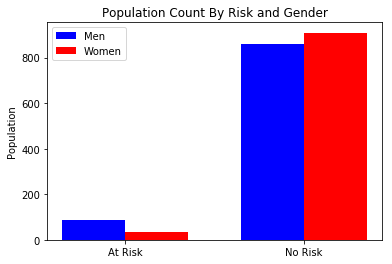

In [8]:
gender_groups = 2

# Collect Men Data
men_at_risk = data['gender'][data['gender'] == 'm'][data['heroin'] == 1].count()
men_no_risk = data['gender'][data['gender'] == 'm'][data['heroin'] == 0].count()
men = (men_at_risk, men_no_risk)

# Collect Women Data
women_at_risk = data['gender'][data['gender'] == 'f'][data['heroin'] == 1].count()
women_no_risk = data['gender'][data['gender'] == 'f'][data['heroin'] == 0].count()
women = (women_at_risk, women_no_risk)

fig, gender_plot = plt.subplots()

# Assign Bars
gender_ind = np.arange(gender_groups)
width = 0.35

men_bar = gender_plot.bar(gender_ind, men, width, color='b')
women_bar = gender_plot.bar(gender_ind + width, women, width, color='r')

# Plot Configuration
gender_plot.set_ylabel('Population')
gender_plot.set_title('Population Count By Risk and Gender')
gender_plot.set_xticks(gender_ind + width / 2)
gender_plot.set_xticklabels(('At Risk', 'No Risk'))
gender_plot.legend((men_bar[0], women_bar[0]), ('Men', 'Women'))

# Show Plot
plt.show()

Finally, we split our data up into train and test data. This split data will be used to train and validate our Tensorflow model.

In [9]:
train_file_name = 'drug.data'
train_file = "%s/%s" % (data_directory, train_file_name)

test_file_name = 'drug.test'
test_file = "%s/%s" % (data_directory, test_file_name)

# Randomly Sample 70% of the Data to serve as Training Data.
train = data.sample(n = int(len(data.index) * .7))

# Remove all samples selected as Training Data to get the remaining Test Data.
test = data.drop(train.index)

print("train_count: %s\ntesting_count: %s" % (len(train.index), len(test.index)))

# Calculate number of Positive and Negative events for Training and Test Data.
train_positives = len(train[train['heroin'].isin([1])].index)
train_negatives = len(train.index) - train_positives
test_positives = len(test[test['heroin'].isin([1])].index)
test_negatives = len(test.index) - test_positives

print("train_positives: %s\ntrain_negatives: %s" % (train_positives, train_negatives))
print("test_positives: %s\ntest_negatives: %s" % (test_positives, test_negatives))

train.to_csv(train_file, header=False)
test.to_csv(test_file, header=False)

train_count: 1319
testing_count: 566
train_positives: 79
train_negatives: 1240
test_positives: 39
test_negatives: 527


### Training a Tensorflow Model  
With all of our data engineering out of the way, we are ready to set up our tensors and train a Tensorflow model to perform predictions.

Similar to when we first downloaded and engineered our data, we specify some values that will be used to manage our model, including its location and some configuration.

In [10]:
# Disable GPU usage as we do not need it for our model.
run_config = tf.estimator.RunConfig().replace(
  session_config=tf.ConfigProto(device_count={'GPU': 0}))

# Directory where the model will be stored.
model_directory = '/tmp/drug_model'

# Specify number of forward and back passes over the whole training set.
train_epochs = 40

# Specify number of passes prior to each evaluation.
epochs_per_eval = 2

# Specify number of training instances to pass over at a time.
batch_size = 20

# Specify number of hidden layers and nodes in the Deep Neural Network Model.
hidden_units = [100, 75, 50, 25]

# Specify number of examples for each set of data.
num_examples = {
    'train': 1319,
    'validation': 566,
}

# Specify remaining columns after our data clean up process.
train_columns = [
    'id', 'age', 'gender', 'education', 'country', 'ethnicity', 'n_score', 'e_score',
    'o_score', 'a_score', 'c_score', 'impulsive', 'ss', 'alcohol', 'amphet',
    'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'heroin', 'ketamine', 'nicotine', 'vsa']

# Specify default vlaues for missing values for each column.
train_column_defaults = [
    [''], [''], [''], [''], [''], [''], [0.0], [0.0], 
    [0.0], [0.0], [0.0], [0.0], [0.0], [''], [''], 
    [''], [''], [''], [''], [''], [''], [''], [''], ['']]

Now that we have some of the model configuration out of the way, we can begin setting up our Tensors. For a long time, I couldn't wrap my head around what the word "Tensor" really meant, but now I have realized it's just a really fancy word for a Feature that has been specified to pass through a Tensorflow model. A little unnecessary, but hey, I didn't write the API.

In [11]:
# Categorical Features to pass into the Linear Model.
age = tf.feature_column.categorical_column_with_vocabulary_list(
  'age', [
      '18-24','25-34','35-44','45-54','55-64','65+'])

gender = tf.feature_column.categorical_column_with_vocabulary_list(
  'gender', [
      'f', 'm'])

education = tf.feature_column.categorical_column_with_vocabulary_list(
  'education', [
      'Left school before 16 years', 'Left school at 16 years',
      'Left school at 17 years', 'Left school at 18 years',
      'Some college or university, no certificate or degree',
      'Professional certificate/ diploma', 'University degree',
      'Masters degree', 'Doctorate degree'])

country = tf.feature_column.categorical_column_with_vocabulary_list(
  'country', [
      'Australia', 'Canada', 'New Zealand', 'Other', 
      'Republic of Ireland', 'UK', 'USA'])

ethnicity = tf.feature_column.categorical_column_with_vocabulary_list(
  'ethnicity', [
      'Asian', 'Black', 'Mixed-Black/Asian', 'Mixed-White/Asian', 
      'Mixed-White/Black', 'Other', 'White'])

alcohol = tf.feature_column.categorical_column_with_vocabulary_list(
  'alcohol', [
      'Never Used', 'Used over a Decade Ago', 'Used in Last Decade',
      'Used in Last Year', 'Used in Last Month', 'Used in Last Week',
      'Used in Last Day'])

amphet = tf.feature_column.categorical_column_with_vocabulary_list(
  'amphet', [
      'Never Used', 'Used over a Decade Ago', 'Used in Last Decade',
      'Used in Last Year', 'Used in Last Month', 'Used in Last Week',
      'Used in Last Day'])

amyl = tf.feature_column.categorical_column_with_vocabulary_list(
  'amyl', [
      'Never Used', 'Used over a Decade Ago', 'Used in Last Decade',
      'Used in Last Year', 'Used in Last Month', 'Used in Last Week',
      'Used in Last Day'])

benzos = tf.feature_column.categorical_column_with_vocabulary_list(
  'benzos', [
      'Never Used', 'Used over a Decade Ago', 'Used in Last Decade',
      'Used in Last Year', 'Used in Last Month', 'Used in Last Week',
      'Used in Last Day'])

caff = tf.feature_column.categorical_column_with_vocabulary_list(
  'caff', [
      'Never Used', 'Used over a Decade Ago', 'Used in Last Decade',
      'Used in Last Year', 'Used in Last Month', 'Used in Last Week',
      'Used in Last Day'])

cannabis = tf.feature_column.categorical_column_with_vocabulary_list(
  'cannabis', [
      'Never Used', 'Used over a Decade Ago', 'Used in Last Decade',
      'Used in Last Year', 'Used in Last Month', 'Used in Last Week',
      'Used in Last Day'])

choc = tf.feature_column.categorical_column_with_vocabulary_list(
  'choc', [
      'Never Used', 'Used over a Decade Ago', 'Used in Last Decade',
      'Used in Last Year', 'Used in Last Month', 'Used in Last Week',
      'Used in Last Day'])

ketamine = tf.feature_column.categorical_column_with_vocabulary_list(
  'ketamine', [
      'Never Used', 'Used over a Decade Ago', 'Used in Last Decade',
      'Used in Last Year', 'Used in Last Month', 'Used in Last Week',
      'Used in Last Day'])

vsa = tf.feature_column.categorical_column_with_vocabulary_list(
  'vsa', [
      'Never Used', 'Used over a Decade Ago', 'Used in Last Decade',
      'Used in Last Year', 'Used in Last Month', 'Used in Last Week',
      'Used in Last Day'])

base_columns = [
  age, gender, education, country, ethnicity, alcohol, amphet, 
  amyl, benzos, caff, cannabis, choc, ketamine]

# Crossed Columns allow us to create cross products of Categorical Feature Columns.
crossed_columns = [
  tf.feature_column.crossed_column(
      ['age', 'education'], hash_bucket_size=1000),
  tf.feature_column.crossed_column(
      ['age', 'education', 'ethnicity'], hash_bucket_size=1000),
  tf.feature_column.crossed_column(
      ['education', 'country'], hash_bucket_size=1000),
  tf.feature_column.crossed_column(
      ['ethnicity', 'education'], hash_bucket_size=1000),
  tf.feature_column.crossed_column(
      ['ethnicity', 'country'], hash_bucket_size=1000),
  tf.feature_column.crossed_column(
      ['ethnicity', 'country', 'education'], hash_bucket_size=1000)]

# Numerical Features to be passed into the Deep Neural Network Model.
n_score = tf.feature_column.numeric_column('n_score')

e_score = tf.feature_column.numeric_column('e_score')

o_score = tf.feature_column.numeric_column('o_score')

a_score = tf.feature_column.numeric_column('a_score')

c_score = tf.feature_column.numeric_column('c_score')

impulsive = tf.feature_column.numeric_column('impulsive')

ss = tf.feature_column.numeric_column('ss')

# The final input for our Linear Model.
wide_columns = base_columns + crossed_columns

# The final input for our Deep Neural Network Model.
deep_columns = [
  n_score, e_score, o_score, a_score, c_score, impulsive, ss]

With our configuration set and our columns specified, we are ready to create our TensorFlow model object. We use the [`DNNLinearCombinedClassifier`](https://www.tensorflow.org/api_docs/python/tf/estimator/DNNLinearCombinedClassifier) in order to perform the combination of Wide and Deep learning.

In [12]:
model = tf.estimator.DNNLinearCombinedClassifier(
        model_dir=model_directory,
        linear_feature_columns=wide_columns,
        dnn_feature_columns=deep_columns,
        dnn_hidden_units=hidden_units,
        config=run_config)

INFO:tensorflow:Using config: {'_model_dir': '/tmp/drug_model', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': device_count {
  key: "GPU"
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


The last step prior to running our TensorFlow Learning Algorithm is to create an input function. This input function will handle everything from loading the data to be used, shuffling it after every evaluation, and extracting the features and labels from the data.

In [13]:
# Input function for training and evaluating.
def input_fn(run_type, data_file, shuffle, num_epochs, batch_size):
  
  # Check to see if the file specified exists.
  assert tf.gfile.Exists(data_file), (
      '%s not found.' % data_file)

  # Extract Text Data
  dataset = tf.contrib.data.TextLineDataset(data_file)

  if run_type == shuffle:
    dataset = dataset.shuffle(buffer_size=num_examples[run_type])

  # Convert our text data into features and labels.
  def parse_csv(value):
    print('Parsing', data_file)
    columns = tf.decode_csv(value, record_defaults=train_column_defaults)
    features = dict(zip(train_columns, columns))
    labels = features.pop('heroin')
    return features, tf.equal(labels, '1')
    
  dataset = dataset.map(parse_csv)

  # Repeat the dataset for the number of epochs we are running.
  dataset = dataset.repeat(num_epochs)
  dataset = dataset.batch(batch_size)

  # Create a one-use iterator to enable TensorFlow to pass through the data.
  iterator = dataset.make_one_shot_iterator()
  features, labels = iterator.get_next()
  return features, labels

Last, but certainly not least, we wipe out our model directory and start training a brand new model using our input functions and our configuration.

In [14]:
# Clean up the model directory if present
shutil.rmtree(model_directory, ignore_errors=True)

# Train and evaluate the model every `epochs_per_eval` epochs.
for n in range(train_epochs // epochs_per_eval):
    model.train(input_fn=lambda: input_fn(
        run_type = 'train',
        data_file = train_file, 
        shuffle = True,
        num_epochs = epochs_per_eval, 
        batch_size = batch_size))

    results = model.evaluate(input_fn=lambda: input_fn(
        run_type = 'test',
        data_file = test_file, 
        shuffle = False,
        num_epochs = 1,
        batch_size = batch_size))

    # Display evaluation metrics.
    print('Results at epoch', (n + 1) * epochs_per_eval)
    print('-' * 60)

    for key in sorted(results):
      print('%s: %s' % (key, results[key]))

Parsing /tmp/drug_data/drug.data
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/drug_model/model.ckpt.
INFO:tensorflow:loss = 16.3888, step = 1
INFO:tensorflow:global_step/sec: 168.475
INFO:tensorflow:loss = 6.82284, step = 101 (0.596 sec)
INFO:tensorflow:Saving checkpoints for 132 into /tmp/drug_model/model.ckpt.
INFO:tensorflow:Loss for final step: 4.56124.
Parsing /tmp/drug_data/drug.test
INFO:tensorflow:Starting evaluation at 2018-01-29-23:32:49
INFO:tensorflow:Restoring parameters from /tmp/drug_model/model.ckpt-132
INFO:tensorflow:Finished evaluation at 2018-01-29-23:32:50
INFO:tensorflow:Saving dict for global step 132: accuracy = 0.931095, accuracy_baseline = 0.931095, auc = 0.751204, auc_precision_recall = 0.140331, average_loss = 0.270573, global_step = 132, label/mean = 0.0689046, loss = 5.28084, prediction/mean = 0.1508
Results at epoch 2
------------------------------------------------------------
accuracy: 0.931095
accuracy_

INFO:tensorflow:Restoring parameters from /tmp/drug_model/model.ckpt-792
INFO:tensorflow:Saving checkpoints for 793 into /tmp/drug_model/model.ckpt.
INFO:tensorflow:loss = 1.09362, step = 793
INFO:tensorflow:global_step/sec: 164.548
INFO:tensorflow:loss = 5.18331, step = 893 (0.610 sec)
INFO:tensorflow:Saving checkpoints for 924 into /tmp/drug_model/model.ckpt.
INFO:tensorflow:Loss for final step: 3.37016.
Parsing /tmp/drug_data/drug.test
INFO:tensorflow:Starting evaluation at 2018-01-29-23:33:42
INFO:tensorflow:Restoring parameters from /tmp/drug_model/model.ckpt-924
INFO:tensorflow:Finished evaluation at 2018-01-29-23:33:42
INFO:tensorflow:Saving dict for global step 924: accuracy = 0.931095, accuracy_baseline = 0.931095, auc = 0.81954, auc_precision_recall = 0.193182, average_loss = 0.212805, global_step = 924, label/mean = 0.0689046, loss = 4.15336, prediction/mean = 0.0634263
Results at epoch 14
------------------------------------------------------------
accuracy: 0.931095
accura

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/drug_model/model.ckpt-1584
INFO:tensorflow:Saving checkpoints for 1585 into /tmp/drug_model/model.ckpt.
INFO:tensorflow:loss = 0.956283, step = 1585
INFO:tensorflow:global_step/sec: 167.268
INFO:tensorflow:loss = 4.80798, step = 1685 (0.600 sec)
INFO:tensorflow:Saving checkpoints for 1716 into /tmp/drug_model/model.ckpt.
INFO:tensorflow:Loss for final step: 3.15852.
Parsing /tmp/drug_data/drug.test
INFO:tensorflow:Starting evaluation at 2018-01-29-23:34:34
INFO:tensorflow:Restoring parameters from /tmp/drug_model/model.ckpt-1716
INFO:tensorflow:Finished evaluation at 2018-01-29-23:34:34
INFO:tensorflow:Saving dict for global step 1716: accuracy = 0.931095, accuracy_baseline = 0.931095, auc = 0.831703, auc_precision_recall = 0.209329, average_loss = 0.206593, global_step = 1716, label/mean = 0.0689046, loss = 4.03213, prediction/mean = 0.0595087
Results at epoch 26
--------------------------------

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/drug_model/model.ckpt-2376
INFO:tensorflow:Saving checkpoints for 2377 into /tmp/drug_model/model.ckpt.
INFO:tensorflow:loss = 0.908314, step = 2377
INFO:tensorflow:global_step/sec: 165.907
INFO:tensorflow:loss = 4.55587, step = 2477 (0.606 sec)
INFO:tensorflow:Saving checkpoints for 2508 into /tmp/drug_model/model.ckpt.
INFO:tensorflow:Loss for final step: 3.01132.
Parsing /tmp/drug_data/drug.test
INFO:tensorflow:Starting evaluation at 2018-01-29-23:35:26
INFO:tensorflow:Restoring parameters from /tmp/drug_model/model.ckpt-2508
INFO:tensorflow:Finished evaluation at 2018-01-29-23:35:26
INFO:tensorflow:Saving dict for global step 2508: accuracy = 0.931095, accuracy_baseline = 0.931095, auc = 0.840267, auc_precision_recall = 0.216222, average_loss = 0.203488, global_step = 2508, label/mean = 0.0689046, loss = 3.97153, prediction/mean = 0.0577534
Results at epoch 38
--------------------------------

That's it! We're done!